In [1]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

# Prepare Data

In [2]:
data = pd.read_csv("WHO-COVID-19-global-data.csv", header=0, index_col=0)
data

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...
2020-10-20,ZW,Zimbabwe,AFRO,12,8159,1,232
2020-10-21,ZW,Zimbabwe,AFRO,28,8187,1,233
2020-10-22,ZW,Zimbabwe,AFRO,28,8215,3,236


In [3]:
fromGermany = data[' Country_code'] == 'DE'
germany = data[fromGermany]
germany = germany[53:-1]
germany

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-02-25,DE,Germany,EURO,0,15,0,0
2020-02-26,DE,Germany,EURO,2,17,0,0
2020-02-27,DE,Germany,EURO,4,21,0,0
2020-02-28,DE,Germany,EURO,26,47,0,0
2020-02-29,DE,Germany,EURO,10,57,0,0
...,...,...,...,...,...,...,...
2020-10-19,DE,Germany,EURO,4325,366299,12,9789
2020-10-20,DE,Germany,EURO,6868,373167,47,9836
2020-10-21,DE,Germany,EURO,7595,380762,39,9875


In [4]:
new_cases = germany[' New_cases']

# Visualization

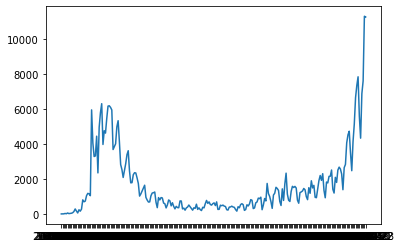

In [5]:
pyplot.plot(new_cases)

# Smoothing

<AxesSubplot:xlabel='Date_reported'>

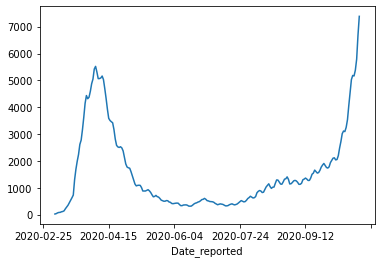

In [6]:
rolling = germany[' New_cases'].rolling(window=10)
rolling_mean = rolling.mean()
rolling_mean.plot()

# Stationary

In [7]:
def printStationary(data, diff_count = 0, lag = 100):
    diff_data = data
    for i in range(diff_count):
        diff_data = diff_data.diff()

    diff_data = diff_data.dropna()
    
    result = adfuller(diff_data.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))        

    print()

    plot_acf(diff_data, lags=100)
    pyplot.plot()

number of differences involved: 0

ADF Statistic: -0.881669
p-value: 0.793949
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574

number of differences involved: 1

ADF Statistic: -1.212837
p-value: 0.668049
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574

number of differences involved: 2

ADF Statistic: -7.999100
p-value: 0.000000
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574

number of differences involved: 3

ADF Statistic: -9.512680
p-value: 0.000000
Critical Values:
	1%: -3.460
	5%: -2.874
	10%: -2.574



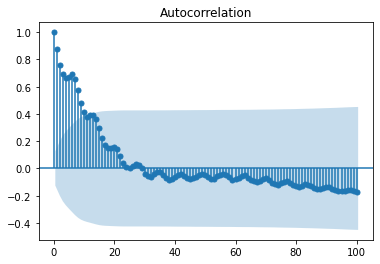

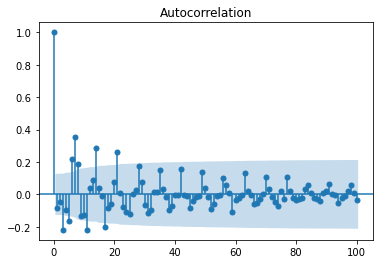

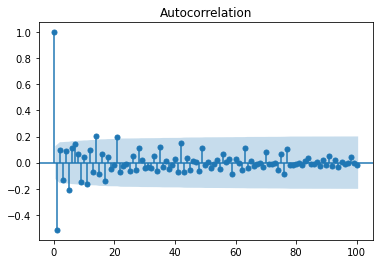

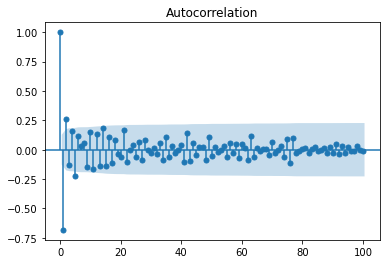

In [8]:
for i in range(4):
    print('number of differences involved: ' + str(i))
    print()

    printStationary(new_cases, i)

# AR and MA Parameter

<AxesSubplot:xlabel='Date_reported'>

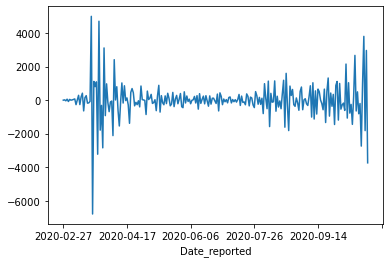

In [9]:
stationary_new_cases = new_cases.diff().diff().dropna()
stationary_new_cases.plot()

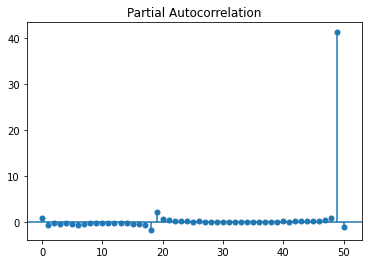

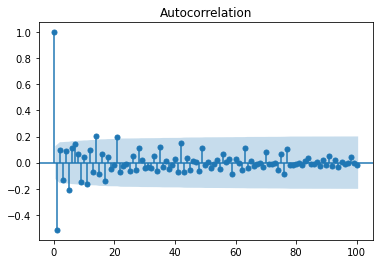

In [10]:
plot_pacf(stationary_new_cases, lags=50)
plot_acf(stationary_new_cases, lags=100)

pyplot.show()

# Predictions

C:\ProgramData\Anaconda3\envs\Predictive-Analytics\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\Predictive-Analytics\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


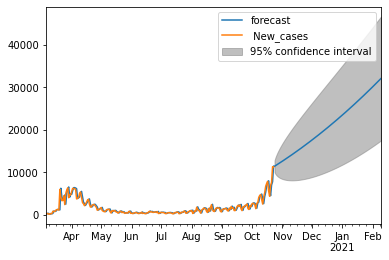

In [11]:
model = ARIMA(new_cases, order=(0, 2, 1))
results = model.fit(disp=-1)

results.plot_predict(10, 350)
pyplot.show()